In [18]:
import numpy as np
import pandas as pd
from pandas import option_context
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

from load_datasets import load_diabetes, load_breast_cancer, load_svmguide1, load_australian, load_mushrooms, load_german
from models import LogisticRegression
from ml_utils import run_solvers, optim_data, run_bench, optim_bench, models_summary, diagnostic
#from solvers_utils import logistic, logistic_der, f_and_df

In [19]:
kdiagnostic = 200
C = 1
ktuning = 400

# Diabetes

In [20]:
data_diab = load_diabetes()

X_train = (614, 9), y_train = (614,)
X_test = (154, 9), y_test = (154,)
Class distribution: {-1.0: 0.3469055374592834, 1.0: 0.6530944625407166}
sklearn train score: 0.762215
sklearn test score: 0.753247
sklearn sol norm: 4.2118903914028545


In [21]:
#CDiab = 1
MDiab = 8
#kDiab = 200
print(f"Iterations: {data_diab[1].size / MDiab}")

Iterations: 76.75


## Benchmark

In [22]:
benchDiab = run_bench(data_diab, C)

benchDiab_data = optim_bench(benchDiab)

## SGD

In [23]:
# BatchGD-Fixed
batchfixed_diab = run_solvers("SGD-Fixed", C, data_diab, kdiagnostic, data_diab[1].size, (1, 0.1, 0.01))

In [24]:
# SGD-Fixed
sgdfixed_diab = run_solvers("SGD-Fixed", C, data_diab, kdiagnostic, MDiab, (0.5, 0.1, 0.01))

In [25]:
# SGD-Decreasing
sgddecre_diab = run_solvers("SGD-Decreasing", C, data_diab, kdiagnostic, MDiab, (0.5, 0.1, 0.01))

In [26]:
# SGDM
sgdm_diab = run_solvers("SGDM", C, data_diab, kdiagnostic, MDiab, (0.5, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [27]:
# SGD-Armijo
sgdarmijo_diab = run_solvers("SGD-Armijo", C, data_diab, kdiagnostic, MDiab, (1, 0.1, 0.01))

In [28]:
# MSL-SGDM-C
mslc_diab = run_solvers("MSL-SGDM-C", C, data_diab, kdiagnostic, MDiab, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [29]:
# MSL-SGDM-R
mslr_diab = run_solvers("MSL-SGDM-R", C, data_diab, kdiagnostic, MDiab, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [30]:
modelsDiab_data = optim_data(batchfixed_diab + sgdfixed_diab + sgddecre_diab + sgdm_diab + sgdarmijo_diab + mslc_diab + mslr_diab)

## Summary

In [31]:
models_summary(modelsDiab_data, benchDiab_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,1.328870e-06,NaN,5,0.653094,0.642857,0.193877
3,SGD-Fixed,1,614.0,1.00,0.0,0.662128,1.897459e-16,0.047612,200,0.653094,0.642857,0.193877
4,SGD-Fixed,1,614.0,0.10,0.0,0.662128,9.497691e-10,0.052945,200,0.653094,0.642857,0.193877
2,CG,1,NaN,NaN,NaN,0.662128,2.752638e-06,NaN,6,0.653094,0.642857,0.193876
0,L-BFGS-B,1,NaN,NaN,NaN,0.662128,1.367774e-05,NaN,6,0.653094,0.642857,0.193873
10,SGD-Decreasing,1,8.0,0.10,0.0,0.662128,1.419826e-04,0.593685,200,0.653094,0.642857,0.193948
18,MSL-SGDM-C,1,8.0,1.00,0.9,0.662128,2.034919e-04,4.420800,200,0.653094,0.642857,0.193847
21,MSL-SGDM-R,1,8.0,1.00,0.9,0.662128,2.594624e-04,4.396245,200,0.653094,0.642857,0.193857
19,MSL-SGDM-C,1,8.0,0.10,0.9,0.662128,3.730667e-04,4.329412,200,0.653094,0.642857,0.193981
16,SGD-Armijo,1,8.0,0.10,0.0,0.662128,4.080632e-04,4.345737,200,0.653094,0.642857,0.193881


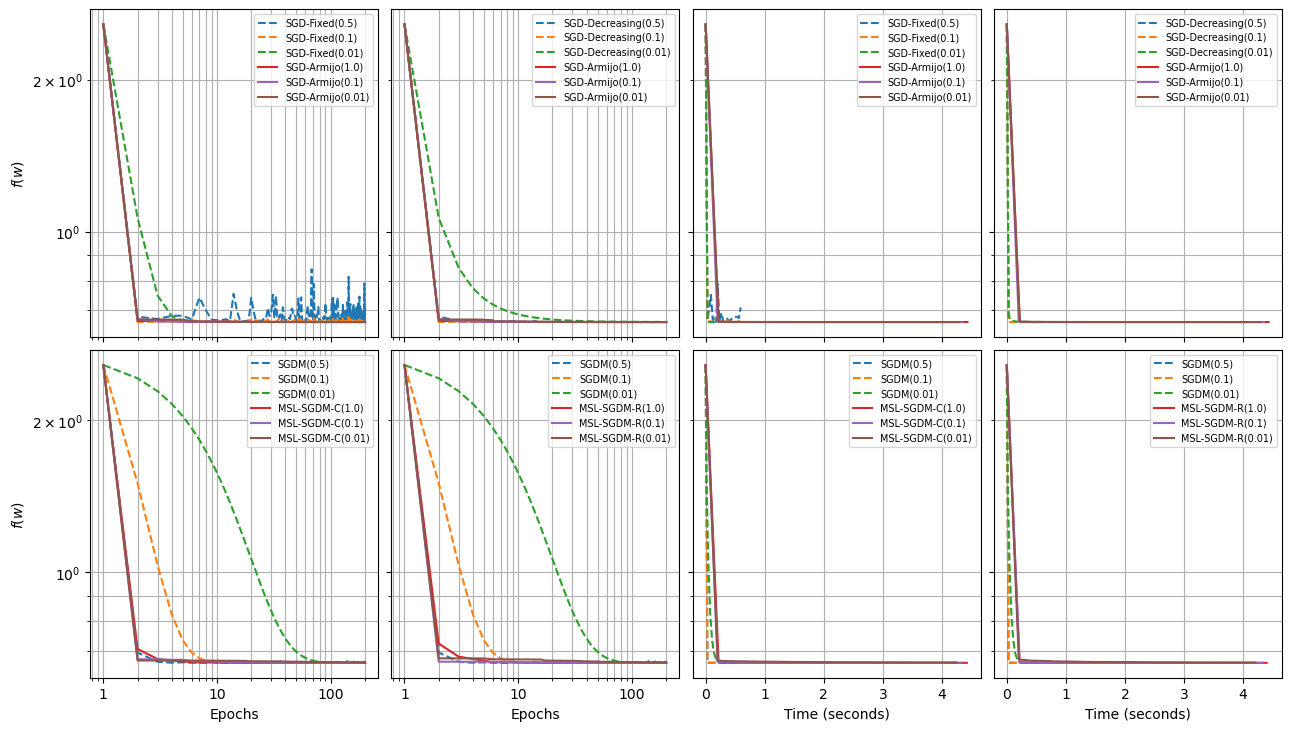

In [32]:
diagnostic(
    optim_data(sgdfixed_diab + sgdarmijo_diab),
    optim_data(sgddecre_diab + sgdarmijo_diab),
    optim_data(sgdm_diab + mslc_diab),
    optim_data(sgdm_diab + mslr_diab),
    benchDiab[0])
plt.savefig("./plots/diab-diagnostic.pdf")

## Fine-tuning

In [33]:
batchfixed_diab1 = LogisticRegression("SGD-Fixed", C).fit(data_diab, ktuning, data_diab[1].size, 0.75, stop=1)

In [34]:
sgdfixed_diab1 = LogisticRegression("SGD-Fixed", C).fit(data_diab, ktuning, MDiab, 0.005, stop=1)

In [35]:
sgddecre_diab1 = LogisticRegression("SGD-Decreasing", C).fit(data_diab, ktuning, MDiab, 1, stop=1)

In [36]:
sgdm_diab1 = LogisticRegression("SGDM", C).fit(data_diab, ktuning, MDiab, 0.05, 0.9, stop=1)

In [37]:
sgdarmijo_diab1 = LogisticRegression("SGD-Armijo", C).fit(data_diab, ktuning, MDiab, 0.1, stop=1)

In [38]:
mslc_diab1 = LogisticRegression("MSL-SGDM-C", C).fit(data_diab, ktuning, MDiab, 1, 0.9, stop=1)

In [39]:
mslr_diab1 = LogisticRegression("MSL-SGDM-R", C).fit(data_diab, ktuning, MDiab, 0.5, 0.9, stop=1)

In [40]:
fine_diab_data = optim_data([batchfixed_diab1, sgdfixed_diab1, sgddecre_diab1, sgdm_diab1, sgdarmijo_diab1, mslc_diab1, mslr_diab1])

test_diab = models_summary(fine_diab_data, benchDiab_data)
test_diab.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,0.000001,NaN,5,0.653094,0.642857,0.193877
2,CG,1,NaN,NaN,NaN,0.662128,0.000003,NaN,6,0.653094,0.642857,0.193876
0,L-BFGS-B,1,NaN,NaN,NaN,0.662128,0.000014,NaN,6,0.653094,0.642857,0.193873
3,SGD-Fixed,1,614.0,0.750,0.0,0.662128,0.000489,0.002001,6,0.653094,0.642857,0.194001
4,SGD-Fixed,1,8.0,0.005,0.0,0.662128,0.000873,0.062531,25,0.653094,0.642857,0.194014
9,MSL-SGDM-R,1,8.0,0.500,0.9,0.662128,0.000923,3.061650,140,0.653094,0.642857,0.194037
5,SGD-Decreasing,1,8.0,1.000,0.0,0.662128,0.000953,0.462549,155,0.653094,0.642857,0.193463
6,SGDM,1,8.0,0.050,0.9,0.662129,0.000927,0.238651,82,0.653094,0.642857,0.193747
7,SGD-Armijo,1,8.0,0.100,0.0,0.662129,0.000966,2.405402,111,0.653094,0.642857,0.193582
8,MSL-SGDM-C,1,8.0,1.000,0.9,0.662129,0.000967,2.730183,124,0.653094,0.642857,0.194083


In [41]:
print(test_diab[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS-B & NaN & 6 & NaN & 0.662128 & 0.000014 & 0.642857 \\
Newton-CG & NaN & 5 & NaN & 0.662128 & 0.000001 & 0.642857 \\
CG & NaN & 6 & NaN & 0.662128 & 0.000003 & 0.642857 \\
SGD-Fixed & 0.750000 & 6 & 0.002001 & 0.662128 & 0.000489 & 0.642857 \\
SGD-Fixed & 0.005000 & 25 & 0.062531 & 0.662128 & 0.000873 & 0.642857 \\
SGD-Decreasing & 1.000000 & 155 & 0.462549 & 0.662128 & 0.000953 & 0.642857 \\
SGDM & 0.050000 & 82 & 0.238651 & 0.662129 & 0.000927 & 0.642857 \\
SGD-Armijo & 0.100000 & 111 & 2.405402 & 0.662129 & 0.000966 & 0.642857 \\
MSL-SGDM-C & 1.000000 & 124 & 2.730183 & 0.662129 & 0.000967 & 0.642857 \\
MSL-SGDM-R & 0.500000 & 140 & 3.061650 & 0.662128 & 0.000923 & 0.642857 \\
\bottomrule
\end{tabular}



# Breast cancer

In [42]:
data_breast = load_breast_cancer()

X_train = (546, 11), y_train = (546,)
X_test = (137, 11), y_test = (137,)
Class distribution: {-1: 0.6684981684981685, 1: 0.3315018315018315}
sklearn train score: 0.972527
sklearn test score: 0.948905
sklearn sol norm: 4.617507942191202


In [43]:
#CBreast = 1
MBreast = 8
#kBreast = 200
print(f"Iterations: {data_breast[1].size / MBreast}")

Iterations: 68.25


## Benchmark

In [44]:
benchBreast = run_bench(data_breast, C)

benchBreast_data = optim_bench(benchBreast)

## SGD

In [45]:
# BatchGD-Fixed
batchfixed_breast = run_solvers("SGD-Fixed", C, data_breast, kdiagnostic, data_breast[1].size, (1, 0.1, 0.01))

In [46]:
# SGD-Fixed
sgdfixed_breast = run_solvers("SGD-Fixed", C, data_breast, kdiagnostic, MBreast, (0.5, 0.1, 0.01))

In [47]:
# SGD-Decreasing
sgddecre_breast = run_solvers("SGD-Decreasing", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01))

In [48]:
# SGDM
sgdm_breast = run_solvers("SGDM", C, data_breast, kdiagnostic, MBreast, (0.5, 0.1, 0.01), (0.9, 0.9, 0.9))

In [49]:
# SGD-Armijo
sgdarmijo_breast = run_solvers("SGD-Armijo", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01))

In [50]:
# MSL-SGDM-C
mslc_breast = run_solvers("MSL-SGDM-C", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [51]:
# MSL-SGDM-R
mslr_breast = run_solvers("MSL-SGDM-R", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [52]:
modelsBreast_data = optim_data(batchfixed_breast + sgdfixed_breast + sgddecre_breast + sgdm_breast + sgdarmijo_breast + mslc_breast + mslr_breast)

## Summary

In [53]:
models_summary(modelsBreast_data, benchBreast_data).sort_values(by="l2-Loss")

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,546.0,0.10,0.0,0.492561,8.064461e-10,0.046916,200,0.902930,0.817518,0.447458
1,Newton-CG,1,NaN,NaN,NaN,0.492561,6.070183e-07,NaN,7,0.902930,0.817518,0.447458
2,CG,1,NaN,NaN,NaN,0.492561,2.108349e-06,NaN,8,0.902930,0.817518,0.447459
0,L-BFGS-B,1,NaN,NaN,NaN,0.492561,2.781037e-06,NaN,7,0.902930,0.817518,0.447457
17,SGD-Armijo,1,8.0,0.01,0.0,0.492561,1.076054e-04,3.825640,200,0.902930,0.817518,0.447481
10,SGD-Decreasing,1,8.0,0.10,0.0,0.492561,1.923749e-04,0.548890,200,0.902930,0.817518,0.447526
16,SGD-Armijo,1,8.0,0.10,0.0,0.492561,5.711976e-04,3.902471,200,0.902930,0.817518,0.447522
18,MSL-SGDM-C,1,8.0,1.00,0.9,0.492561,8.044391e-04,3.930245,200,0.902930,0.817518,0.447440
14,SGDM,1,8.0,0.01,0.9,0.492562,1.906914e-03,0.533375,200,0.902930,0.817518,0.447548
21,MSL-SGDM-R,1,8.0,1.00,0.9,0.492563,2.076059e-03,3.934764,200,0.902930,0.817518,0.447393


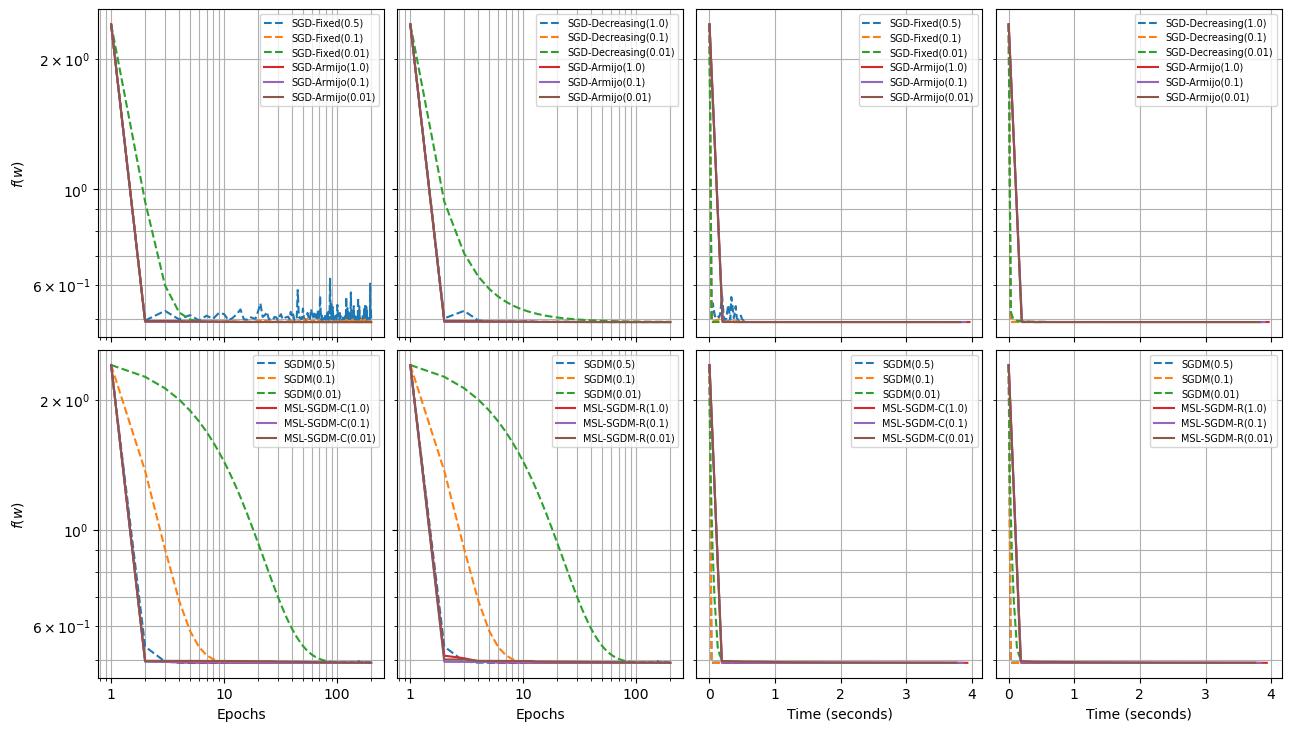

In [54]:
diagnostic(
    optim_data(sgdfixed_breast + sgdarmijo_breast),
    optim_data(sgddecre_breast + sgdarmijo_breast),
    optim_data(sgdm_breast + mslc_breast),
    optim_data(sgdm_breast + mslr_breast),
    benchBreast[0])
plt.savefig("./plots/breast-diagnostic.pdf")

## Fine-tuning

In [55]:
batchfixed_breast1 = LogisticRegression("SGD-Fixed", C).fit(data_breast, ktuning, data_breast[1].size, 0.75, stop=1)

In [56]:
sgdfixed_breast1 = LogisticRegression("SGD-Fixed", C).fit(data_breast, ktuning, MBreast, 0.005, stop=1)

In [57]:
sgddecre_breast1 = LogisticRegression("SGD-Decreasing", C).fit(data_breast, ktuning, MBreast, 1, stop=1)

In [58]:
sgdm_breast1 = LogisticRegression("SGDM", C).fit(data_breast, ktuning, MBreast, 0.04, 0.9, stop=1)

In [59]:
sgdarmijo_breast1 = LogisticRegression("SGD-Armijo", C).fit(data_breast, ktuning, MBreast, 0.05, stop=1)

In [60]:
mslc_breast1 = LogisticRegression("MSL-SGDM-C", C).fit(data_breast, ktuning, MBreast, 0.5, 0.9, stop=1)

In [61]:
mslr_breast1 = LogisticRegression("MSL-SGDM-R", C).fit(data_breast, ktuning, MBreast, 0.75, 0.9, stop=1)

In [62]:
fine_breast_data = optim_data([batchfixed_breast1, sgdfixed_breast1, sgddecre_breast1, sgdm_breast1, sgdarmijo_breast1, mslc_breast1, mslr_breast1])

test_breast = models_summary(fine_breast_data, benchBreast_data)
test_breast.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.492561,6.070183e-07,NaN,7,0.90293,0.817518,0.447458
2,CG,1,NaN,NaN,NaN,0.492561,2.108349e-06,NaN,8,0.90293,0.817518,0.447459
0,L-BFGS-B,1,NaN,NaN,NaN,0.492561,2.781037e-06,NaN,7,0.90293,0.817518,0.447457
3,SGD-Fixed,1,546.0,0.750,0.0,0.492561,7.985904e-04,0.000000,12,0.90293,0.817518,0.447133
5,SGD-Decreasing,1,8.0,1.000,0.0,0.492561,6.663238e-04,0.440947,156,0.90293,0.817518,0.447586
6,SGDM,1,8.0,0.040,0.9,0.492561,7.878449e-04,0.217180,76,0.90293,0.817518,0.447260
4,SGD-Fixed,1,8.0,0.005,0.0,0.492561,9.515956e-04,0.093828,35,0.90293,0.817518,0.447612
7,SGD-Armijo,1,8.0,0.050,0.0,0.492561,9.875249e-04,2.694488,139,0.90293,0.817518,0.447364
8,MSL-SGDM-C,1,8.0,0.500,0.9,0.492561,1.202331e-03,7.852451,400,0.90293,0.817518,0.447496
9,MSL-SGDM-R,1,8.0,0.750,0.9,0.492562,1.419192e-03,7.836583,400,0.90293,0.817518,0.447526


In [63]:
print(test_breast[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS-B & NaN & 7 & NaN & 0.492561 & 0.000003 & 0.817518 \\
Newton-CG & NaN & 7 & NaN & 0.492561 & 0.000001 & 0.817518 \\
CG & NaN & 8 & NaN & 0.492561 & 0.000002 & 0.817518 \\
SGD-Fixed & 0.750000 & 12 & 0.000000 & 0.492561 & 0.000799 & 0.817518 \\
SGD-Fixed & 0.005000 & 35 & 0.093828 & 0.492561 & 0.000952 & 0.817518 \\
SGD-Decreasing & 1.000000 & 156 & 0.440947 & 0.492561 & 0.000666 & 0.817518 \\
SGDM & 0.040000 & 76 & 0.217180 & 0.492561 & 0.000788 & 0.817518 \\
SGD-Armijo & 0.050000 & 139 & 2.694488 & 0.492561 & 0.000988 & 0.817518 \\
MSL-SGDM-C & 0.500000 & 400 & 7.852451 & 0.492561 & 0.001202 & 0.817518 \\
MSL-SGDM-R & 0.750000 & 400 & 7.836583 & 0.492562 & 0.001419 & 0.817518 \\
\bottomrule
\end{tabular}



# svmguide1

In [64]:
data_svm = load_svmguide1()

X_train = (3089, 5), y_train = (3089,)
X_test = (4000, 5), y_test = (4000,)
Class distribution: {-1: 0.3525412754936873, 1: 0.6474587245063127}
sklearn train score: 0.950469
sklearn test score: 0.952500
sklearn sol norm: 22.236118835373052


In [65]:
#Csvm = 1
Msvm = 32
#ksvm = 200
print(f"Iterations: {data_svm[1].size / Msvm}")

Iterations: 96.53125


## Benchmark

In [66]:
benchSvm = run_bench(data_svm, C)

benchSvm_data = optim_bench(benchSvm)

## SGD

In [67]:
# BatchGD-Fixed
batchfixed_svm = run_solvers("SGD-Fixed", C, data_svm, kdiagnostic, data_svm[1].size, (0.5, 0.1, 0.01))

In [68]:
# SGD-Fixed
sgdfixed_svm = run_solvers("SGD-Fixed", C, data_svm, kdiagnostic, Msvm, (0.5, 0.1, 0.01))

In [69]:
# SGD-Decreasing
sgddecre_svm = run_solvers("SGD-Decreasing", C, data_svm, kdiagnostic, Msvm, (1, 0.1, 0.01))

In [70]:
# SGDM
sgdm_svm = run_solvers("SGDM", C, data_svm, kdiagnostic, Msvm, (0.5, 0.1, 0.01), (0.9, 0.9, 0.9))

In [71]:
# SGD-Armijo
sgdarmijo_svm = run_solvers("SGD-Armijo", C, data_svm, kdiagnostic, Msvm, (1, 0.1, 0.01))

In [72]:
# MSL-SGDM-C
mslc_svm = run_solvers("MSL-SGDM-C", C, data_svm, kdiagnostic, Msvm, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [73]:
# MSL-SGDM-R
mslr_svm = run_solvers("MSL-SGDM-R", C, data_svm, kdiagnostic, Msvm, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [74]:
modelsSvm_data = optim_data(batchfixed_svm + sgdfixed_svm + sgddecre_svm + sgdarmijo_svm + sgdm_svm + mslc_svm + mslr_svm)

## Summary

In [75]:
models_summary(modelsSvm_data, benchSvm_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,3089.0,0.10,0.0,0.673302,6.616181e-10,0.139358,200,0.653933,0.51675,0.181802
3,SGD-Fixed,1,3089.0,0.50,0.0,0.673302,5.898060e-17,0.140553,200,0.653933,0.51675,0.181802
1,Newton-CG,1,NaN,NaN,NaN,0.673302,3.544459e-07,NaN,5,0.653933,0.51675,0.181802
2,CG,1,NaN,NaN,NaN,0.673302,8.300304e-06,NaN,8,0.653933,0.51675,0.181795
0,L-BFGS-B,1,NaN,NaN,NaN,0.673302,1.321807e-05,NaN,5,0.653933,0.51625,0.181793
10,SGD-Decreasing,1,32.0,0.10,0.0,0.673302,2.869591e-05,0.923838,200,0.653933,0.51675,0.181784
14,SGD-Armijo,1,32.0,0.01,0.0,0.673302,4.065209e-05,15.807101,200,0.653933,0.51675,0.181823
18,MSL-SGDM-C,1,32.0,1.00,0.9,0.673302,1.235807e-04,15.912033,200,0.653933,0.51625,0.181868
13,SGD-Armijo,1,32.0,0.10,0.0,0.673302,1.750188e-04,15.957577,200,0.653933,0.51675,0.181889
19,MSL-SGDM-C,1,32.0,0.10,0.9,0.673302,1.891973e-04,15.663730,200,0.653933,0.51675,0.181922


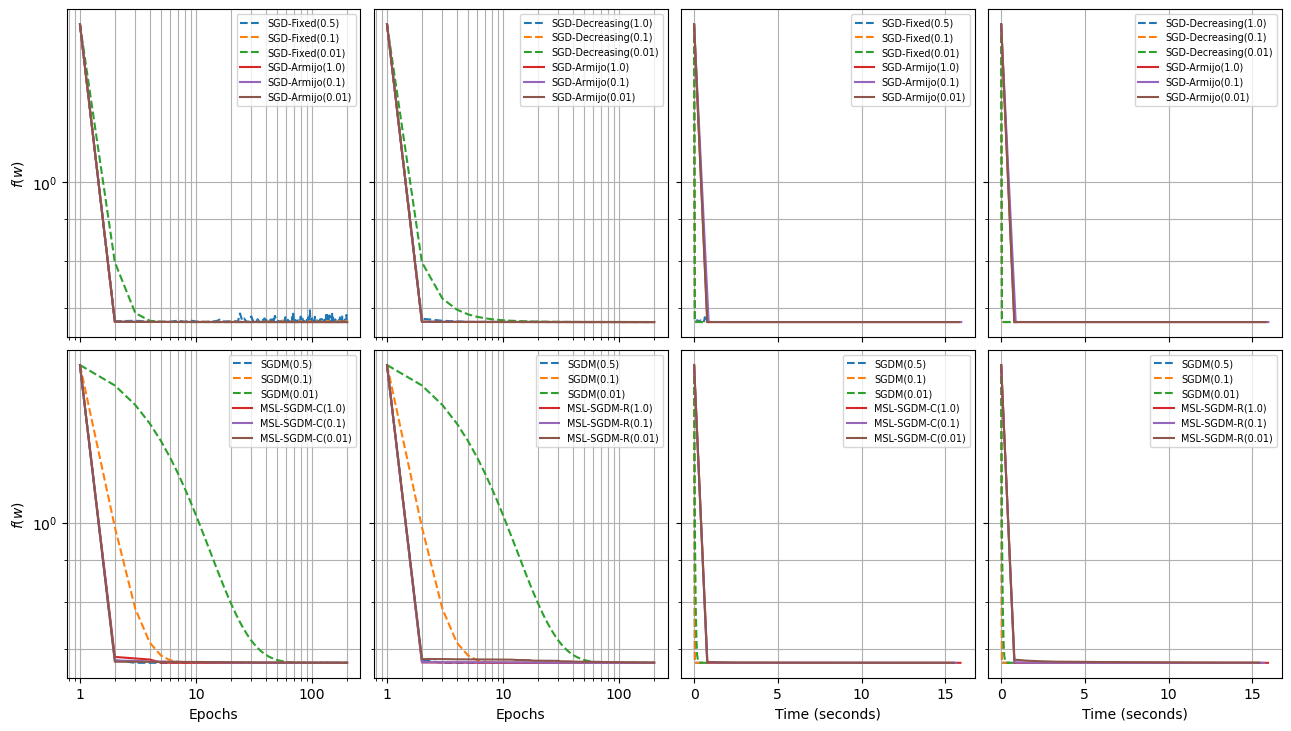

In [76]:
diagnostic(
    optim_data(sgdfixed_svm + sgdarmijo_svm),
    optim_data(sgddecre_svm + sgdarmijo_svm),
    optim_data(sgdm_svm + mslc_svm),
    optim_data(sgdm_svm + mslr_svm),
    benchSvm[0])
plt.savefig("./plots/svm-diagnostic.pdf")

## Fine-tuning

In [77]:
batchfixed_svm1 = LogisticRegression("SGD-Fixed", C).fit(data_svm, ktuning, data_svm[1].size, 0.75, stop=1)

In [78]:
sgdfixed_svm1 = LogisticRegression("SGD-Fixed", C).fit(data_svm, ktuning, Msvm, 0.01, stop=1)

In [79]:
sgddecre_svm1 = LogisticRegression("SGD-Decreasing", C).fit(data_svm, ktuning, Msvm, 1, stop=1)

In [80]:
sgdm_svm1 = LogisticRegression("SGDM", C).fit(data_svm, ktuning, Msvm, 0.05, 0.9, stop=1)

In [81]:
sgdarmijo_svm1 = LogisticRegression("SGD-Armijo", C).fit(data_svm, ktuning, Msvm, 0.25, stop=1)

In [82]:
mslc_svm1 = LogisticRegression("MSL-SGDM-C", C).fit(data_svm, ktuning, Msvm, 0.1, 0.9, stop=1)

In [83]:
mslr_svm1 = LogisticRegression("MSL-SGDM-R", C).fit(data_svm, ktuning, Msvm, 0.5, 0.9, stop=1)

In [84]:
fine_svm_data = optim_data([batchfixed_svm1, sgdfixed_svm1, sgddecre_svm1, sgdm_svm1, sgdarmijo_svm1, mslc_svm1, mslr_svm1])

test_svm = models_summary(fine_svm_data, benchSvm_data)
test_svm.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.673302,3.544459e-07,NaN,5,0.653933,0.51675,0.181802
2,CG,1,NaN,NaN,NaN,0.673302,8.300304e-06,NaN,8,0.653933,0.51675,0.181795
0,L-BFGS-B,1,NaN,NaN,NaN,0.673302,1.321807e-05,NaN,5,0.653933,0.51625,0.181793
3,SGD-Fixed,1,3089.0,0.75,0.0,0.673302,2.403935e-04,0.006000,6,0.653933,0.51625,0.181799
9,MSL-SGDM-R,1,32.0,0.50,0.9,0.673303,6.653605e-04,6.691144,84,0.653610,0.51600,0.181947
4,SGD-Fixed,1,32.0,0.01,0.0,0.673303,8.231604e-04,0.047692,9,0.653933,0.51700,0.181516
5,SGD-Decreasing,1,32.0,1.00,0.0,0.673303,9.352571e-04,0.520897,108,0.653610,0.51600,0.182287
6,SGDM,1,32.0,0.05,0.9,0.673303,8.809781e-04,0.141057,30,0.653933,0.51625,0.181413
7,SGD-Armijo,1,32.0,0.25,0.0,0.673303,9.936281e-04,2.249824,28,0.653610,0.51600,0.181357
8,MSL-SGDM-C,1,32.0,0.10,0.9,0.673303,9.953547e-04,11.907822,150,0.653610,0.51600,0.181947


In [85]:
print(test_svm[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS-B & NaN & 5 & NaN & 0.673302 & 0.000013 & 0.516250 \\
Newton-CG & NaN & 5 & NaN & 0.673302 & 0.000000 & 0.516750 \\
CG & NaN & 8 & NaN & 0.673302 & 0.000008 & 0.516750 \\
SGD-Fixed & 0.750000 & 6 & 0.006000 & 0.673302 & 0.000240 & 0.516250 \\
SGD-Fixed & 0.010000 & 9 & 0.047692 & 0.673303 & 0.000823 & 0.517000 \\
SGD-Decreasing & 1.000000 & 108 & 0.520897 & 0.673303 & 0.000935 & 0.516000 \\
SGDM & 0.050000 & 30 & 0.141057 & 0.673303 & 0.000881 & 0.516250 \\
SGD-Armijo & 0.250000 & 28 & 2.249824 & 0.673303 & 0.000994 & 0.516000 \\
MSL-SGDM-C & 0.100000 & 150 & 11.907822 & 0.673303 & 0.000995 & 0.516000 \\
MSL-SGDM-R & 0.500000 & 84 & 6.691144 & 0.673303 & 0.000665 & 0.516000 \\
\bottomrule
\end{tabular}



# Australian

In [86]:
data_austr = load_australian()

X_train = (552, 15), y_train = (552,)
X_test = (138, 15), y_test = (138,)
Class distribution: {-1.0: 0.5362318840579711, 1.0: 0.463768115942029}
sklearn train score: 0.867754
sklearn test score: 0.862319
sklearn sol norm: 3.4331049997375587


In [87]:
#CAustr = 1
MAustr = 8
#kAustr = 200
print(f"Iterations: {data_austr[1].size / MAustr}")

Iterations: 69.0


## Benchmark

In [88]:
benchAustr = run_bench(data_austr, C)

benchAustr_data = optim_bench(benchAustr)

## SGD

In [89]:
# BatchGD-Fixed
batchfixed_austr = run_solvers("SGD-Fixed", C, data_austr, kdiagnostic, data_austr[1].size, (1, 0.1, 0.01))

In [90]:
# SGD-Fixed
sgdfixed_austr = run_solvers("SGD-Fixed", C, data_austr, kdiagnostic, MAustr, (0.3, 0.1, 0.01))

In [91]:
# SGD-Decreasing
sgddecre_austr = run_solvers("SGD-Decreasing", C, data_austr, kdiagnostic, MAustr, (0.5, 0.1, 0.01))

In [92]:
# SGDM
sgdm_austr = run_solvers("SGDM", C, data_austr, kdiagnostic, MAustr, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [93]:
# SGD-Armijo
sgdarmijo_austr = run_solvers("SGD-Armijo", C, data_austr, kdiagnostic, MAustr, (1, 0.1, 0.01))

In [94]:
# MSL-SGDM-C
mslc_austr = run_solvers("MSL-SGDM-C", C, data_austr, kdiagnostic, MAustr, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [95]:
# MSL-SGDM-R
mslr_austr = run_solvers("MSL-SGDM-R", C, data_austr, kdiagnostic, MAustr, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [96]:
modelsAustr_data = optim_data(batchfixed_austr + sgdfixed_austr + sgddecre_austr + sgdm_austr + sgdarmijo_austr + mslc_austr + mslr_austr)

## Summary

In [97]:
models_summary(modelsAustr_data, benchAustr_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,552.0,0.10,0.0,0.615582,8.355306e-10,0.073904,200,0.855072,0.876812,0.335335
1,Newton-CG,1,NaN,NaN,NaN,0.615582,1.326493e-06,NaN,7,0.855072,0.876812,0.335335
0,L-BFGS-B,1,NaN,NaN,NaN,0.615582,3.613973e-06,NaN,7,0.855072,0.876812,0.335333
2,CG,1,NaN,NaN,NaN,0.615582,5.034286e-06,NaN,8,0.855072,0.876812,0.335337
10,SGD-Decreasing,1,8.0,0.10,0.0,0.615582,1.630153e-04,0.567718,200,0.855072,0.876812,0.335364
9,SGD-Decreasing,1,8.0,0.50,0.0,0.615583,2.487715e-03,0.570466,200,0.858696,0.876812,0.335346
14,SGDM,1,8.0,0.01,0.9,0.615584,2.557471e-03,0.568350,200,0.851449,0.876812,0.334934
16,SGD-Armijo,1,8.0,0.10,0.0,0.615585,2.655143e-03,5.872191,200,0.853261,0.876812,0.334846
13,SGDM,1,8.0,0.10,0.9,0.615591,4.997040e-03,0.551901,200,0.851449,0.876812,0.333721
17,SGD-Armijo,1,8.0,0.01,0.0,0.615591,4.394456e-03,5.796384,200,0.853261,0.876812,0.334893


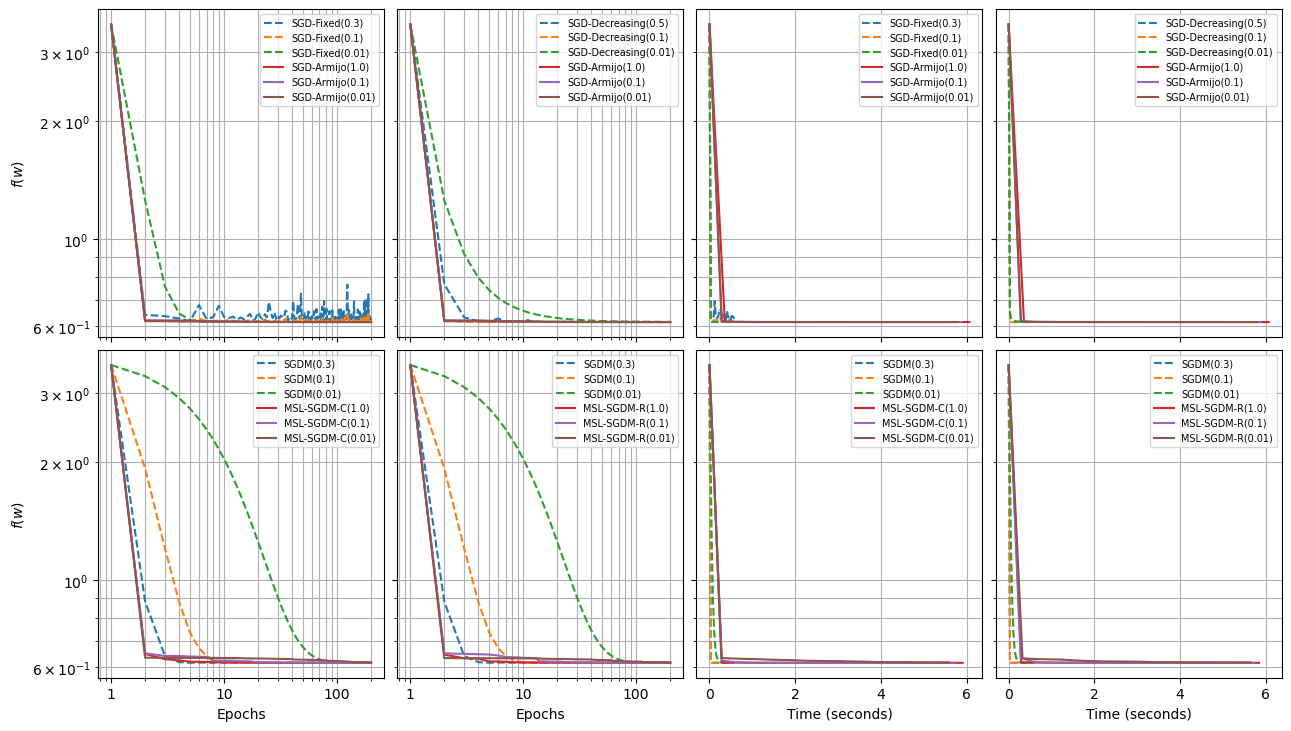

In [98]:
diagnostic(
    optim_data(sgdfixed_austr + sgdarmijo_austr),
    optim_data(sgddecre_austr + sgdarmijo_austr),
    optim_data(sgdm_austr + mslc_austr),
    optim_data(sgdm_austr + mslr_austr),
    benchAustr[0])
plt.savefig("./plots/austr-diagnostic.pdf")

## Fine-tuning

In [99]:
batchfixed_austr1 = LogisticRegression("SGD-Fixed", C).fit(data_austr, ktuning, data_austr[1].size, 0.2, stop=1)

In [100]:
sgdfixed_austr1 = LogisticRegression("SGD-Fixed", C).fit(data_austr, ktuning, MAustr, 0.001, stop=1)

In [101]:
sgddecre_austr1 = LogisticRegression("SGD-Decreasing", C).fit(data_austr, ktuning, MAustr, 0.05, stop=1)

In [102]:
sgdm_austr1 = LogisticRegression("SGDM", C).fit(data_austr, ktuning, MAustr, 0.02, 0.9, stop=1)

In [103]:
sgdarmijo_austr1 = LogisticRegression("SGD-Armijo", C).fit(data_austr, ktuning, MAustr, 0.01, stop=1)

In [104]:
mslc_austr1 = LogisticRegression("MSL-SGDM-C", C).fit(data_austr, ktuning, MAustr, 0.75, 0.9, stop=1)

In [105]:
mslr_austr1 = LogisticRegression("MSL-SGDM-R", C).fit(data_austr, ktuning, MAustr, 0.75, 0.9, stop=1)

In [106]:
fine_austr_data = optim_data([batchfixed_austr1, sgdfixed_austr1, sgddecre_austr1, sgdm_austr1, sgdarmijo_austr1, mslc_austr1, mslr_austr1])

test_austr = models_summary(fine_austr_data, benchAustr_data).sort_values(by=["l2-Loss", "Grad norm"])
test_austr

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.615582,0.000001,NaN,7,0.855072,0.876812,0.335335
0,L-BFGS-B,1,NaN,NaN,NaN,0.615582,0.000004,NaN,7,0.855072,0.876812,0.335333
2,CG,1,NaN,NaN,NaN,0.615582,0.000005,NaN,8,0.855072,0.876812,0.335337
3,SGD-Fixed,1,552.0,0.200,0.0,0.615582,0.000802,0.017509,34,0.855072,0.876812,0.335299
5,SGD-Decreasing,1,8.0,0.050,0.0,0.615582,0.000905,0.055009,18,0.855072,0.876812,0.335443
6,SGDM,1,8.0,0.020,0.9,0.615582,0.000939,0.545526,190,0.855072,0.876812,0.335041
4,SGD-Fixed,1,8.0,0.001,0.0,0.615582,0.000951,0.335962,108,0.855072,0.876812,0.335361
7,SGD-Armijo,1,8.0,0.010,0.0,0.615584,0.002271,11.785688,400,0.855072,0.876812,0.335446
9,MSL-SGDM-R,1,8.0,0.750,0.9,0.615589,0.004003,11.842499,400,0.855072,0.876812,0.335230
8,MSL-SGDM-C,1,8.0,0.750,0.9,0.615590,0.004013,11.742516,400,0.855072,0.876812,0.335305


In [107]:
print(test_austr[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.615582 & 0.000001 & 0.876812 \\
L-BFGS-B & NaN & 7 & NaN & 0.615582 & 0.000004 & 0.876812 \\
CG & NaN & 8 & NaN & 0.615582 & 0.000005 & 0.876812 \\
SGD-Fixed & 0.200000 & 34 & 0.017509 & 0.615582 & 0.000802 & 0.876812 \\
SGD-Decreasing & 0.050000 & 18 & 0.055009 & 0.615582 & 0.000905 & 0.876812 \\
SGDM & 0.020000 & 190 & 0.545526 & 0.615582 & 0.000939 & 0.876812 \\
SGD-Fixed & 0.001000 & 108 & 0.335962 & 0.615582 & 0.000951 & 0.876812 \\
SGD-Armijo & 0.010000 & 400 & 11.785688 & 0.615584 & 0.002271 & 0.876812 \\
MSL-SGDM-R & 0.750000 & 400 & 11.842499 & 0.615589 & 0.004003 & 0.876812 \\
MSL-SGDM-C & 0.750000 & 400 & 11.742516 & 0.615590 & 0.004013 & 0.876812 \\
\bottomrule
\end{tabular}



# Mushrooms

In [108]:
data_mush = load_mushrooms()

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Class distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}
sklearn train score: 1.000000
sklearn test score: 1.000000
sklearn sol norm: 11.74605798576869


In [109]:
#Cmush = 1
Mmush = 64
#kmush = 200
print(f"Iterations: {data_mush[1].size / Mmush}")

Iterations: 101.546875


## Benchmark

In [110]:
benchMush = run_bench(data_mush, C)

benchMush_data = optim_bench(benchMush)

## SGD

In [111]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", C, data_mush, kdiagnostic, data_mush[1].size, (1, 0.1, 0.01))

In [112]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", C, data_mush, kdiagnostic, Mmush, (0.3, 0.1, 0.01))

In [113]:
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", C, data_mush, kdiagnostic, Mmush, (0.5, 0.1, 0.01))

In [114]:
# SGDM
sgdm_mush = run_solvers("SGDM", C, data_mush, kdiagnostic, Mmush, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [115]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", C, data_mush, kdiagnostic, Mmush, (1, 0.1, 0.01))

In [116]:
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", C, data_mush, kdiagnostic, Mmush, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [117]:
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", C, data_mush, kdiagnostic, Mmush, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [118]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [119]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,6499.0,0.10,0.0,0.580925,3.551600e-09,0.866125,200,0.892291,0.886154,0.399399
1,Newton-CG,1,NaN,NaN,NaN,0.580925,1.380831e-04,NaN,8,0.892291,0.886154,0.399399
0,L-BFGS-B,1,NaN,NaN,NaN,0.580925,6.046219e-06,NaN,9,0.892291,0.886154,0.399396
2,CG,1,NaN,NaN,NaN,0.580925,2.245995e-05,NaN,10,0.892291,0.886154,0.399402
10,SGD-Decreasing,1,64.0,0.10,0.0,0.580925,2.539729e-04,1.376074,200,0.892291,0.886154,0.399418
9,SGD-Decreasing,1,64.0,0.50,0.0,0.580925,7.294569e-04,1.383759,200,0.892291,0.886154,0.399631
14,SGDM,1,64.0,0.01,0.9,0.580925,1.013412e-03,1.346745,200,0.892445,0.886769,0.399487
13,SGDM,1,64.0,0.10,0.9,0.580928,2.679719e-03,1.349106,200,0.892599,0.886154,0.399593
16,SGD-Armijo,1,64.0,0.10,0.0,0.580933,3.992932e-03,36.300954,200,0.892291,0.886154,0.399224
17,SGD-Armijo,1,64.0,0.01,0.0,0.580933,4.200961e-03,35.924074,200,0.892291,0.886154,0.399156


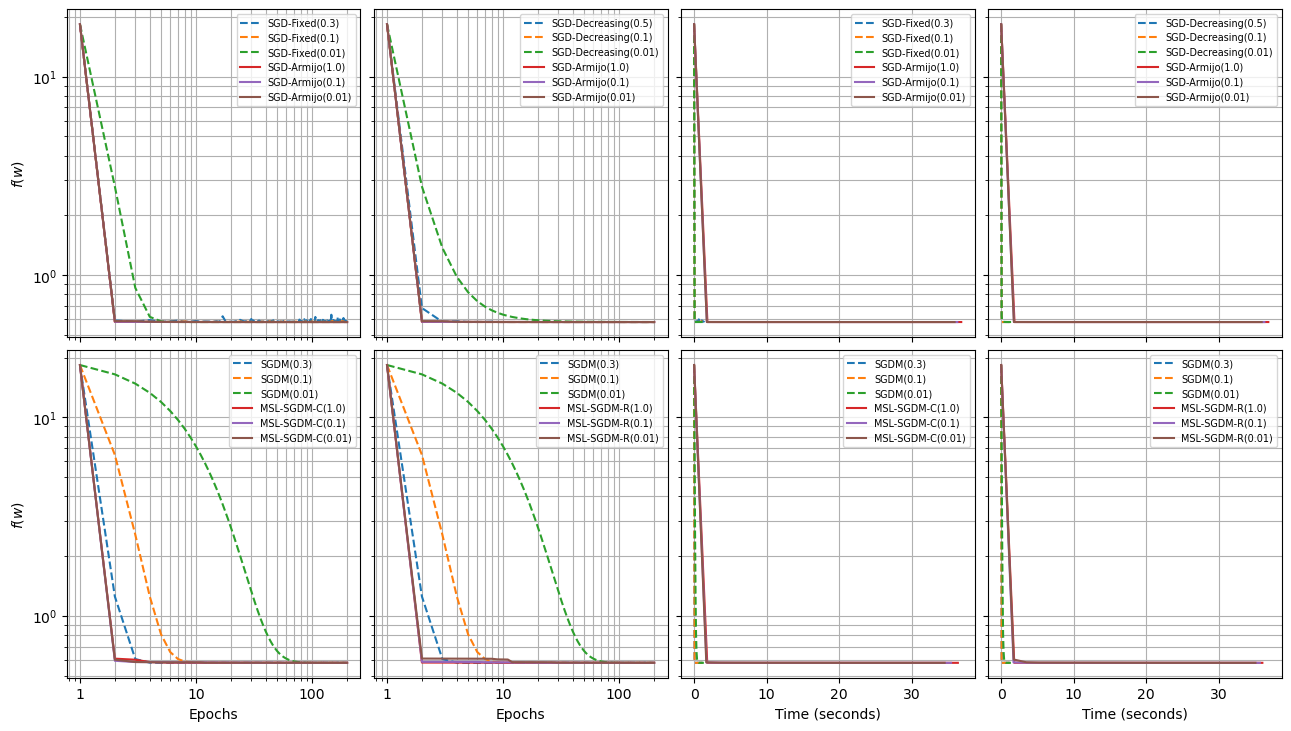

In [120]:
diagnostic(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-diagnostic.pdf")

## Fine-tuning

In [121]:
batchfixed_mush1 = LogisticRegression("SGD-Fixed", C).fit(data_mush, ktuning, data_mush[1].size, 0.05, stop=1)

In [122]:
sgdfixed_mush1 = LogisticRegression("SGD-Fixed", C).fit(data_mush, ktuning, Mmush, 0.001, stop=1)

In [123]:
sgddecre_mush1 = LogisticRegression("SGD-Decreasing", C).fit(data_mush, ktuning, Mmush, 0.1, stop=1)

In [124]:
sgdm_mush1 = LogisticRegression("SGDM", C).fit(data_mush, ktuning, Mmush, 0.03, 0.9, stop=1)

In [125]:
sgdarmijo_mush1 = LogisticRegression("SGD-Armijo", C).fit(data_mush, ktuning, Mmush, 0.01, stop=1)

In [126]:
mslc_mush1 = LogisticRegression("MSL-SGDM-C", C).fit(data_mush, ktuning, Mmush, 0.025, 0.9, stop=1)

In [127]:
mslr_mush1 = LogisticRegression("MSL-SGDM-R", C).fit(data_mush, ktuning, Mmush, 0.025, 0.9, stop=1)

In [128]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.580925,0.000138,NaN,8,0.892291,0.886154,0.399399
0,L-BFGS-B,1,NaN,NaN,NaN,0.580925,0.000006,NaN,9,0.892291,0.886154,0.399396
2,CG,1,NaN,NaN,NaN,0.580925,0.000022,NaN,10,0.892291,0.886154,0.399402
4,SGD-Fixed,1,64.0,0.001,0.0,0.580925,0.000755,0.606327,90,0.892291,0.886154,0.399387
6,SGDM,1,64.0,0.030,0.9,0.580925,0.000988,0.478473,72,0.892445,0.886154,0.399404
5,SGD-Decreasing,1,64.0,0.100,0.0,0.580925,0.000996,0.177925,26,0.892445,0.886154,0.399287
3,SGD-Fixed,1,6499.0,0.050,0.0,0.580925,0.000977,0.729878,168,0.892291,0.886154,0.399376
7,SGD-Armijo,1,64.0,0.010,0.0,0.580927,0.002367,71.820671,400,0.892291,0.886154,0.399588
8,MSL-SGDM-C,1,64.0,0.025,0.9,0.580941,0.005641,70.169078,400,0.892137,0.886154,0.399294
9,MSL-SGDM-R,1,64.0,0.025,0.9,0.580942,0.005871,69.970500,400,0.892291,0.886154,0.399394


In [129]:
print(test_mush[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 8 & NaN & 0.580925 & 0.000138 & 0.886154 \\
L-BFGS-B & NaN & 9 & NaN & 0.580925 & 0.000006 & 0.886154 \\
CG & NaN & 10 & NaN & 0.580925 & 0.000022 & 0.886154 \\
SGD-Fixed & 0.001000 & 90 & 0.606327 & 0.580925 & 0.000755 & 0.886154 \\
SGDM & 0.030000 & 72 & 0.478473 & 0.580925 & 0.000988 & 0.886154 \\
SGD-Decreasing & 0.100000 & 26 & 0.177925 & 0.580925 & 0.000996 & 0.886154 \\
SGD-Fixed & 0.050000 & 168 & 0.729878 & 0.580925 & 0.000977 & 0.886154 \\
SGD-Armijo & 0.010000 & 400 & 71.820671 & 0.580927 & 0.002367 & 0.886154 \\
MSL-SGDM-C & 0.025000 & 400 & 70.169078 & 0.580941 & 0.005641 & 0.886154 \\
MSL-SGDM-R & 0.025000 & 400 & 69.970500 & 0.580942 & 0.005871 & 0.886154 \\
\bottomrule
\end{tabular}



# German

In [130]:
data_german = load_german()

X_train = (800, 25), y_train = (800,)
X_test = (200, 25), y_test = (200,)
Class distribution: {-1.0: 0.69875, 1.0: 0.30125}
sklearn train score: 0.782500
sklearn test score: 0.780000
sklearn sol norm: 2.3059775145851873


In [131]:
#Cgerman = 1
Mgerman = 8
#kgerman = 200
print(f"Iterations: {data_german[1].size / Mgerman}")

Iterations: 100.0


## Benchmark

In [132]:
benchgerman = run_bench(data_german, C)

benchgerman_data = optim_bench(benchgerman)

## SGD

In [133]:
# BatchGD-Fixed
batchfixed_german = run_solvers("SGD-Fixed", C, data_german, kdiagnostic, data_german[1].size, (1, 0.1, 0.01))

In [134]:
# SGD-Fixed
sgdfixed_german = run_solvers("SGD-Fixed", C, data_german, kdiagnostic, Mgerman, (0.3, 0.1, 0.01))

In [135]:
# SGD-Decreasing
sgddecre_german = run_solvers("SGD-Decreasing", C, data_german, kdiagnostic, Mgerman, (0.5, 0.1, 0.01))

In [136]:
# SGDM
sgdm_german = run_solvers("SGDM", C, data_german, kdiagnostic, Mgerman, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [137]:
# SGD-Armijo
sgdarmijo_german = run_solvers("SGD-Armijo", C, data_german, kdiagnostic, Mgerman, (1, 0.1, 0.01))

In [138]:
# MSL-SGDM-C
mslc_german = run_solvers("MSL-SGDM-C", C, data_german, kdiagnostic, Mgerman, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [139]:
# MSL-SGDM-R
mslr_german = run_solvers("MSL-SGDM-R", C, data_german, kdiagnostic, Mgerman, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [140]:
modelsgerman_data = optim_data(batchfixed_german + sgdfixed_german + sgddecre_german + sgdm_german + sgdarmijo_german + mslc_german + mslr_german)

## Summary

In [141]:
models_summary(modelsgerman_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.619120,7.208674e-07,NaN,7,0.70125,0.700,0.248182
4,SGD-Fixed,1,800.0,0.10,0.0,0.619120,1.019632e-09,0.099093,200,0.70125,0.700,0.248182
0,L-BFGS-B,1,NaN,NaN,NaN,0.619120,8.766908e-06,NaN,10,0.70125,0.700,0.248179
2,CG,1,NaN,NaN,NaN,0.619120,1.698375e-05,NaN,9,0.70125,0.700,0.248183
10,SGD-Decreasing,1,8.0,0.10,0.0,0.619120,2.758767e-04,0.889909,200,0.70125,0.700,0.248196
14,SGDM,1,8.0,0.01,0.9,0.619122,2.240961e-03,0.873491,200,0.70125,0.700,0.248210
9,SGD-Decreasing,1,8.0,0.50,0.0,0.619124,4.778694e-03,0.892360,200,0.70125,0.700,0.246663
16,SGD-Armijo,1,8.0,0.10,0.0,0.619126,3.714744e-03,10.108657,200,0.70125,0.700,0.248742
17,SGD-Armijo,1,8.0,0.01,0.0,0.619132,4.967449e-03,10.038102,200,0.70125,0.700,0.248757
11,SGD-Decreasing,1,8.0,0.01,0.0,0.619139,6.260069e-03,0.897365,200,0.70125,0.700,0.248045


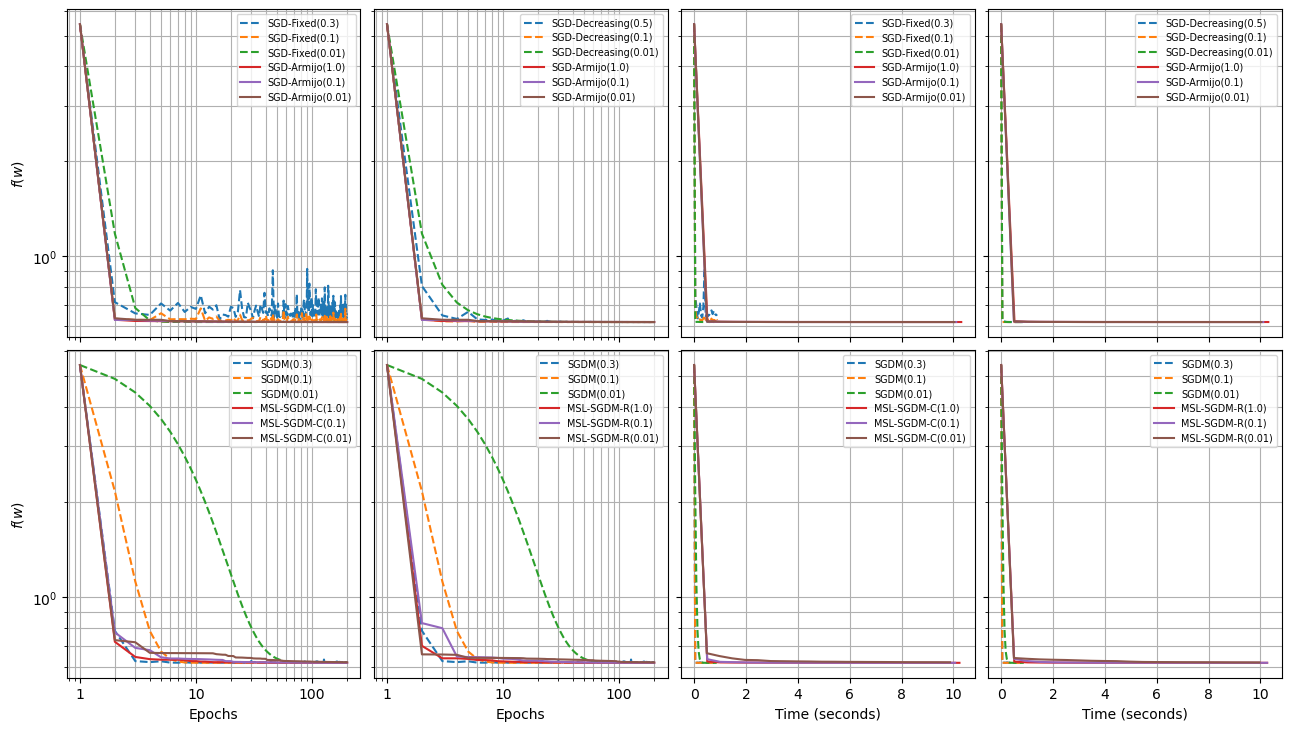

In [142]:
diagnostic(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-diagnostic.pdf")

## Fine-tuning

In [143]:
batchfixed_german1 = LogisticRegression("SGD-Fixed", C).fit(data_german, ktuning, data_german[1].size, 0.5, stop=1)

In [144]:
sgdfixed_german1 = LogisticRegression("SGD-Fixed", C).fit(data_german, ktuning, Mgerman, 0.001, stop=1)

In [145]:
sgddecre_german1 = LogisticRegression("SGD-Decreasing", C).fit(data_german, ktuning, Mgerman, 0.25, stop=1)

In [146]:
sgdm_german1 = LogisticRegression("SGDM", C).fit(data_german, ktuning, Mgerman, 0.005, 0.9, stop=1)

In [147]:
sgdarmijo_german1 = LogisticRegression("SGD-Armijo", C).fit(data_german, ktuning, Mgerman, 0.05, stop=1)

In [148]:
mslc_german1 = LogisticRegression("MSL-SGDM-C", C).fit(data_german, ktuning, Mgerman, 0.5, 0.9, stop=1)

In [149]:
mslr_german1 = LogisticRegression("MSL-SGDM-R", C).fit(data_german, ktuning, Mgerman, 0.5, 0.9, stop=1)

In [150]:
fine_german_data = optim_data([batchfixed_german1, sgdfixed_german1, sgddecre_german1, sgdm_german1, sgdarmijo_german1, mslc_german1, mslr_german1])

test_german = models_summary(fine_german_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])
test_german

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.619120,7.208674e-07,NaN,7,0.70125,0.7,0.248182
0,L-BFGS-B,1,NaN,NaN,NaN,0.619120,8.766908e-06,NaN,10,0.70125,0.7,0.248179
2,CG,1,NaN,NaN,NaN,0.619120,1.698375e-05,NaN,9,0.70125,0.7,0.248183
3,SGD-Fixed,1,800.0,0.500,0.0,0.619120,6.133016e-04,0.008000,12,0.70125,0.7,0.248078
4,SGD-Fixed,1,8.0,0.001,0.0,0.619120,9.006921e-04,0.376986,83,0.70125,0.7,0.248394
5,SGD-Decreasing,1,8.0,0.250,0.0,0.619121,8.989069e-04,0.732211,161,0.70125,0.7,0.248040
6,SGDM,1,8.0,0.005,0.9,0.619121,9.956598e-04,1.604464,363,0.70125,0.7,0.248064
7,SGD-Armijo,1,8.0,0.050,0.0,0.619122,1.949541e-03,20.499342,400,0.70125,0.7,0.248214
8,MSL-SGDM-C,1,8.0,0.500,0.9,0.619132,4.833502e-03,20.791095,400,0.70125,0.7,0.248349
9,MSL-SGDM-R,1,8.0,0.500,0.9,0.619136,5.760277e-03,20.560718,400,0.70125,0.7,0.248349


In [151]:
print(test_german[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.619120 & 0.000001 & 0.700000 \\
L-BFGS-B & NaN & 10 & NaN & 0.619120 & 0.000009 & 0.700000 \\
CG & NaN & 9 & NaN & 0.619120 & 0.000017 & 0.700000 \\
SGD-Fixed & 0.500000 & 12 & 0.008000 & 0.619120 & 0.000613 & 0.700000 \\
SGD-Fixed & 0.001000 & 83 & 0.376986 & 0.619120 & 0.000901 & 0.700000 \\
SGD-Decreasing & 0.250000 & 161 & 0.732211 & 0.619121 & 0.000899 & 0.700000 \\
SGDM & 0.005000 & 363 & 1.604464 & 0.619121 & 0.000996 & 0.700000 \\
SGD-Armijo & 0.050000 & 400 & 20.499342 & 0.619122 & 0.001950 & 0.700000 \\
MSL-SGDM-C & 0.500000 & 400 & 20.791095 & 0.619132 & 0.004834 & 0.700000 \\
MSL-SGDM-R & 0.500000 & 400 & 20.560718 & 0.619136 & 0.005760 & 0.700000 \\
\bottomrule
\end{tabular}

